<a href="https://colab.research.google.com/github/mylethidiem/zero-to-hero/blob/main/tools/data_jobs_scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from collections import Counter

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

In [ ]:
skills = [
    'python', 'sql', 'excel ','excel\,', 'r studio', 'power bi', 'powerbi', 'tableau', 'machine learning',
    'deep learning', 'aws', 'azure', 'gcp', 'hadoop', 'spark', 'data visualization',
    'data analytics', 'statistics', 'numpy', 'pandas', 'scikit-learn', 'nlp', 'big data',
    'java', 'scala', 'kafka', 'etl', 'domo', 'gcp', 'amazon web service', 'docker', 'rest api',
    'azkaban', 'luigi', 'airflow', 'google cloud', 'bigquery','pyspark'

    'c', 'c++', 'r', 'llm', 'nlp','langchain', 'java', 'machine learning',
    'vlm', 'luigi', 'large language models', 'ocr', 'optical character recognition',
    'cloud', 'opencv', 'computer vision', 'big data', 'math', 'statistics', 'data science',
    'deep learning', 'cloud applications', 'LLaMA', 'ocr', 'gen ai','generative ai', 'gpt',

    'google analytics', 'data warehouse', 'snowflake', 'brick', 'mysql', 'sql server', 'postgres', 'olap', 'dax', 'power platform', 'power automate', 'database'
]

In [ ]:
def extract_skills(text, skills_list):
    found_skills = [skill for skill in skills_list if skill in text]
    # print(found_skills)
    return found_skills

In [ ]:
def extract_skills_list(data):
    # Apply preprocessing to job descriptions
    data['clean_description'] = data['description'].apply(preprocess_text)
    # Extract skills from each job description
    data['skills'] = data['clean_description'].apply(lambda x: extract_skills(x, skills))
    # print(data['skills'])

    all_skills = data['skills'].sum()  # Flatten the list of lists

    skill_counts = Counter(all_skills)  # Count occurrences

    # Convert to a DataFrame for easier visualization
    skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
    skill_df = skill_df.sort_values(by='Frequency', ascending=False)
    # print(skill_df.head(50))  # Display the top 10 skills
    return skill_df

Data scientist jobs at viet nam

In [ ]:
ds_data = pd.read_csv('/content/dataset_linkedin-jobs-scraper_2025-01-26_14-43-33-952_datascientist_anytime.csv')

# Inspect the first few rows
print(ds_data.head())

                  applicationsCount   applyType  \
0                     54 applicants    EXTERNAL   
1  Be among the first 25 applicants    EXTERNAL   
2  Be among the first 25 applicants  EASY_APPLY   
3                     65 applicants    EXTERNAL   
4  Be among the first 25 applicants  EASY_APPLY   

                                            applyUrl  benefits    companyId  \
0  https://snaphyre.snaphunt.com/job/DCRM8UJVGM-V...       NaN   80814014.0   
1  https://careers.shopee.sg/job-detail/J00335271...       NaN    6451760.0   
2  https://vn.linkedin.com/jobs/view/data-scienti...       NaN    2411523.0   
3  https://www.careers-page.com/coder-trove/job/L...       NaN  100943086.0   
4  https://vn.linkedin.com/jobs/view/data-scienti...       NaN   13688376.0   

          companyName                                         companyUrl  \
0            Snaphyre  https://sg.linkedin.com/company/snaphyre?trk=p...   
1              Shopee  https://sg.linkedin.com/company/shopee?trk=

Artificial intelligent viet nam jobs







In [ ]:
ai_data = pd.read_csv('/content/dataset_linkedin-jobs-scraper_2025-01-26_15-05-20-563_artificial_intelligent_vietnam.csv')

# Inspect the first few rows
print(ai_data.head())

                  applicationsCount   applyType  \
0                     52 applicants    EXTERNAL   
1                    136 applicants    EXTERNAL   
2  Be among the first 25 applicants  EASY_APPLY   
3                     65 applicants    EXTERNAL   
4                     54 applicants    EXTERNAL   

                                            applyUrl  benefits    companyId  \
0  https://www.careers-page.com/azeus-systems-lim...       NaN    2680286.0   
1  https://snaphyre.snaphunt.com/job/8K7W3ZMU8U-V...       NaN   80814014.0   
2  https://vn.linkedin.com/jobs/view/ai-engineer-...       NaN    4873071.0   
3  https://www.careers-page.com/coder-trove/job/L...       NaN  100943086.0   
4  https://snaphyre.snaphunt.com/job/DCRM8UJVGM-V...       NaN   80814014.0   

             companyName                                         companyUrl  \
0  Azeus Systems Limited  https://sg.linkedin.com/company/azeus-systems-...   
1               Snaphyre  https://sg.linkedin.com/company/sn

Machine learning viet nam jobs

In [ ]:
ml_data = pd.read_csv('/content/dataset_linkedin-jobs-scraper_2025-01-26_15-10-35-149_machinelearning_vietnam.csv')

# Inspect the first few rows
print(ml_data.head())

                  applicationsCount   applyType  \
0  Be among the first 25 applicants  EASY_APPLY   
1                     65 applicants    EXTERNAL   
2                     26 applicants    EXTERNAL   
3  Be among the first 25 applicants  EASY_APPLY   
4                     54 applicants    EXTERNAL   

                                            applyUrl  benefits    companyId  \
0  https://vn.linkedin.com/jobs/view/ai-engineer-...       NaN    4873071.0   
1  https://www.careers-page.com/coder-trove/job/L...       NaN  100943086.0   
2  https://www.get.it/job/remote-machine-learning...       NaN    5182084.0   
3  https://vn.linkedin.com/jobs/view/machine-lear...       NaN   92636599.0   
4  https://snaphyre.snaphunt.com/job/DCRM8UJVGM-V...       NaN   80814014.0   

   companyName                                         companyUrl  \
0     SmartDev  https://vn.linkedin.com/company/smartdev-llc-?...   
1  Coder Trove  https://au.linkedin.com/company/coder-trove?tr...   
2       Sco

# Dedup if one job mention a skill twice or more

In [ ]:
def extract_unique_skills(text, skills_list):
    text = text.replace('powerbi', 'power bi')
    found_skills = {skill for skill in skills_list if skill in text}  # Use a set for unique values
    return list(found_skills)  # Convert back to list if needed

In [ ]:
def display_unique_skills(data, skill_df):
    #
    # Flatten the list of lists into a single list of skills
    all_unique_skills = data['skills'].sum()
    # Use Counter to count occurrences of each skill across all descriptions
    skill_counts = Counter(all_unique_skills)

    # Convert to DataFrame for easier visualization
    skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
    skill_df = skill_df.sort_values(by='Frequency', ascending=False)

    # Display the top 10 skills
    print(skill_df.head(77))
    return skill_df

In [ ]:
#
skill_df_ds = extract_skills_list(ds_data)
skill_df_ai = extract_skills_list(ai_data)
skill_df_ml = extract_skills_list(ml_data)

# Extract unique skills from each job description
ds_data['skills'] = ds_data['clean_description'].apply(lambda x: extract_unique_skills(x, skills))
ai_data['skills'] = ai_data['clean_description'].apply(lambda x: extract_unique_skills(x, skills))
ml_data['skills'] = ml_data['clean_description'].apply(lambda x: extract_unique_skills(x, skills))

In [ ]:
print("Data scientist jobs at viet nam")
skill_df_ds = display_unique_skills(ds_data, skill_df_ds)

Machine learning viet nam jobs
                    Skill  Frequency
3                       r        229
4                  python        153
1                    java        100
15                    aws         93
22                  cloud         88
16                  scala         85
2                     sql         83
10       machine learning         76
8                database         61
23                 docker         47
5            data science         42
27                  azure         42
18          deep learning         36
9                    math         35
20                    llm         32
29           google cloud         31
7              statistics         29
31                    gcp         27
11                    nlp         26
21         data analytics         23
25               big data         23
0           generative ai         22
37               postgres         22
13                  spark         20
33        computer vision         18
17  lar

In [ ]:
print("Artificial intelligent viet nam jobs")
skill_df_ai = display_unique_skills(ai_data, skill_df_ai)

Data scientist jobs at viet nam
                    Skill  Frequency
8                       r        250
12       machine learning        125
11                 python        124
2                   cloud         78
0                     aws         70
10                  scala         65
3            data science         62
6                    java         55
20                    llm         47
7                     sql         47
25                   math         44
16          generative ai         40
15          deep learning         40
28             statistics         38
4                   azure         38
9                database         35
31                  spark         29
13                    nlp         27
5                  docker         27
22        computer vision         27
32                    gcp         25
14           google cloud         25
1   large language models         25
34         data analytics         24
35               big data         21
23    

In [ ]:
print("Machine learning viet nam jobs")
skill_df_ml = display_unique_skills(ml_data, skill_df_ml)

Artificial intelligent viet nam jobs
                    Skill  Frequency
7                       r        227
9                  python        139
10       machine learning        132
17                    aws        102
14                  scala         92
6                     sql         88
1                   cloud         77
2            data science         55
8                database         55
24                  azure         45
23                   java         43
18                   math         43
4                  docker         34
15          deep learning         33
13                    llm         33
27                  spark         33
20             statistics         33
26                    gcp         28
38                    etl         26
33         data analytics         25
22        computer vision         24
28               big data         24
21                    nlp         24
32           google cloud         21
44               postgres         19
3

In [ ]:
ds_data

,applicationsCount,applyType,applyUrl,benefits,companyId,companyName,companyUrl,contractType,description,experienceLevel,...,postedTime,posterFullName,posterProfileUrl,publishedAt,salary,sector,title,workType,clean_description,skills
0,54 applicants,EXTERNAL,https://snaphyre.snaphunt.com/job/DCRM8UJVGM-V...,NaN,80814014.0,Snaphyre,https://sg.linkedin.com/company/snaphyre?trk=p...,Full-time,Our client is a pioneering AI data company tha...,Entry level,...,6 days ago,NaN,NaN,2025-01-20,NaN,Information Services,AI Training Engineer (Remote | Flexi-time),Engineering and Information Technology,our client is a pioneering ai data company tha...,"[generative ai, java, sql, r, python]"
1,Be among the first 25 applicants,EXTERNAL,https://careers.shopee.sg/job-detail/J00335271...,NaN,6451760.0,Shopee,https://sg.linkedin.com/company/shopee?trk=pub...,Full-time,Job Description\n\n\n * Develop and implement ...,Mid-Senior level,...,5 days ago,NaN,NaN,2025-01-20,NaN,"Internet Marketplace Platforms and Technology,...","Senior Data Scientist - Business Intelligence,...","Strategy/Planning, Analyst, and Consulting",job description\n\n\n develop and implement a...,"[data science, pandas, sql, statistics, r, dat..."
2,Be among the first 25 applicants,EASY_APPLY,https://vn.linkedin.com/jobs/view/data-scienti...,NaN,2411523.0,SETA International,https://www.linkedin.com/company/seta-internat...,Full-time,SETA INTERNATIONAL VIETNAM - RECRUITMENT\n\nJo...,Entry level,...,6 days ago,Lily Nguyen,https://vn.linkedin.com/in/lily-nguyen-768419257,2025-01-20,NaN,IT Services and IT Consulting,Data Scientist,Engineering and Information Technology,seta international vietnam recruitment\n\njob...,"[aws, data science, pandas, r, database, scala..."
3,65 applicants,EXTERNAL,https://www.careers-page.com/coder-trove/job/L...,NaN,100943086.0,Coder Trove,https://au.linkedin.com/company/coder-trove?tr...,Full-time,Coder Trove is seeking an AI Developer to join...,Not Applicable,...,6 days ago,NaN,NaN,2025-01-20,NaN,Software Development,AI Developer,Engineering and Information Technology,coder trove is seeking an ai developer to join...,"[large language models, data science, r, scala..."
4,Be among the first 25 applicants,EASY_APPLY,https://vn.linkedin.com/jobs/view/data-scienti...,NaN,13688376.0,MoMo (M_Service),https://vn.linkedin.com/company/momo-mservice?...,Full-time,Key Responsibilities\n\n * Building Machine Le...,Mid-Senior level,...,3 days ago,Tran Thanh Truc,https://vn.linkedin.com/in/tran-thanh-truc-011193,2025-01-23,NaN,Software Development,Data Scientist,Engineering,key responsibilities\n\n building machine lea...,"[math, machine learning, r]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Be among the first 25 applicants,EXTERNAL,https://www.ncb-bank.vn/vi/tuyen-dung/chuyen-v...,NaN,6384104.0,National Citizen Bank (NCB),https://vn.linkedin.com/company/national-citiz...,Full-time,Mã công việc: 177 Độ tuổi: 25 - 35 Số năm kinh...,Not Applicable,...,1 month ago,NaN,NaN,2024-12-12,NaN,Banking,Chuyên viên/Chuyên viên Cấp cao/Chuyên gia Kiể...,Other,mã công việc 177 độ tuổi 25 35 số năm kinh ng...,[r]
225,27 applicants,EASY_APPLY,https://vn.linkedin.com/jobs/view/senior-softw...,NaN,19093986.0,SAPI,https://uk.linkedin.com/company/sapigroup?trk=...,Full-time,"SAPI builds, tailors, funds and manages your c...",Mid-Senior level,...,1 month ago,NaN,NaN,2024-12-18,NaN,IT Services and IT Consulting,Senior Software Engineer,Engineering,sapi builds tailors funds and manages your cus...,"[cloud, aws, docker, sql, postgres, r, database]"
226,56 applicants,EXTERNAL,https://hubble.breezy.hr/p/3d4579935484-softwa...,NaN,13184745.0,Hubble.Build,https://sg.linkedin.com/company/hubble-pte.-lt...,Full-time,What you will be doing:\n\n * Develop Hubble s...,Entry level,...,1 month ago,NaN,NaN,2024-12-18,NaN,Software Development,Software Engineer (Mobile),Engineering and Information Technology,what you will be doing\n\n develop hubble s

# Visualise

In [ ]:
!pip install pillow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import matplotlib.patches as patches
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def find_logo(skill, logos_folder='logos'):
    """Find a matching logo file for a given skill"""
    # List of common image extensions
    extensions = ['.png', '.jpg', '.jpeg', '.svg', '.gif']

    # Clean skill name (remove spaces, lowercase)
    skill = skill.lower().replace(' ', '')

    # Try to find an exact match
    for ext in extensions:
        filepath = os.path.join(logos_folder, f"{skill}{ext}")
        if os.path.exists(filepath):
            return filepath

    return None

def create_bar_chart_with_logos(df, job_name, logos_folder='logos', figsize=(15, 10)):
    # Sort DataFrame by frequency in descending order
    df = df.sort_values('Frequency', ascending=True)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Create horizontal bar chart
    bars = ax.barh(np.arange(len(df)), df['Frequency'], height=0.6, color='skyblue')

    # Customize chart
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['Skill'])
    # ax.set_ylabel('')
    # ax.set_yticks([])  # This removes the x-axis ticks
    ax.spines['top'].set_visible(False)  # Hide top border
    ax.spines['right'].set_visible(False)  # Hide right border
    ax.spines['bottom'].set_visible(False)  # Hide bottom borde
    title = 'Skills Frequency Distribution for ' + job_name
    ax.set_title(title)

    # Add grid lines
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                ha='left', va='center', fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

        #No logo now
        # Try to add logo
        # skill = df.iloc[i]['Skill']
        # logo_path = find_logo(skill, logos_folder)

        # if logo_path:
        #     try:
        #         # Open and read the image
        #         img = Image.open(logo_path)

        #         # Convert to RGBA if not already
        #         if img.mode != 'RGBA':
        #             img = img.convert('RGBA')

        #         # Resize image if it's too large
        #         max_size = 40  # maximum width or height in pixels
        #         ratio = min(max_size/img.size[0], max_size/img.size[1])
        #         new_size = tuple([int(dim * ratio) for dim in img.size])
        #         img = img.resize(new_size, Image.Resampling.LANCZOS)

        #         # Create an ImageBox and add it to the plot
        #         imagebox = OffsetImage(img, zoom=0.5)  # Adjust zoom as needed
        #         ab = AnnotationBbox(imagebox, (0, i),
        #                           xybox=(-30, 0),  # Offset from y-axis
        #                           xycoords=('data', 'data'),
        #                           boxcoords="offset points",
        #                           frameon=False)
        #
        #         ax.add_artist(ab)
        #     except Exception as e:
        #         print(f"Could not load logo for {skill}: {e}")

    # Adjust layout to prevent label cutoff
    plt.margins(x=0.1)
    plt.tight_layout()

    return fig

In [ ]:
def show_bar_chart(skill_df, job_name = ''):
  # Sample data (replace this with actual counts from your code)
  df = skill_df.copy()
  # Create the visualization
  chart = create_bar_chart_with_logos(df, job_name)

  # Save or display the chart
  plt.show()

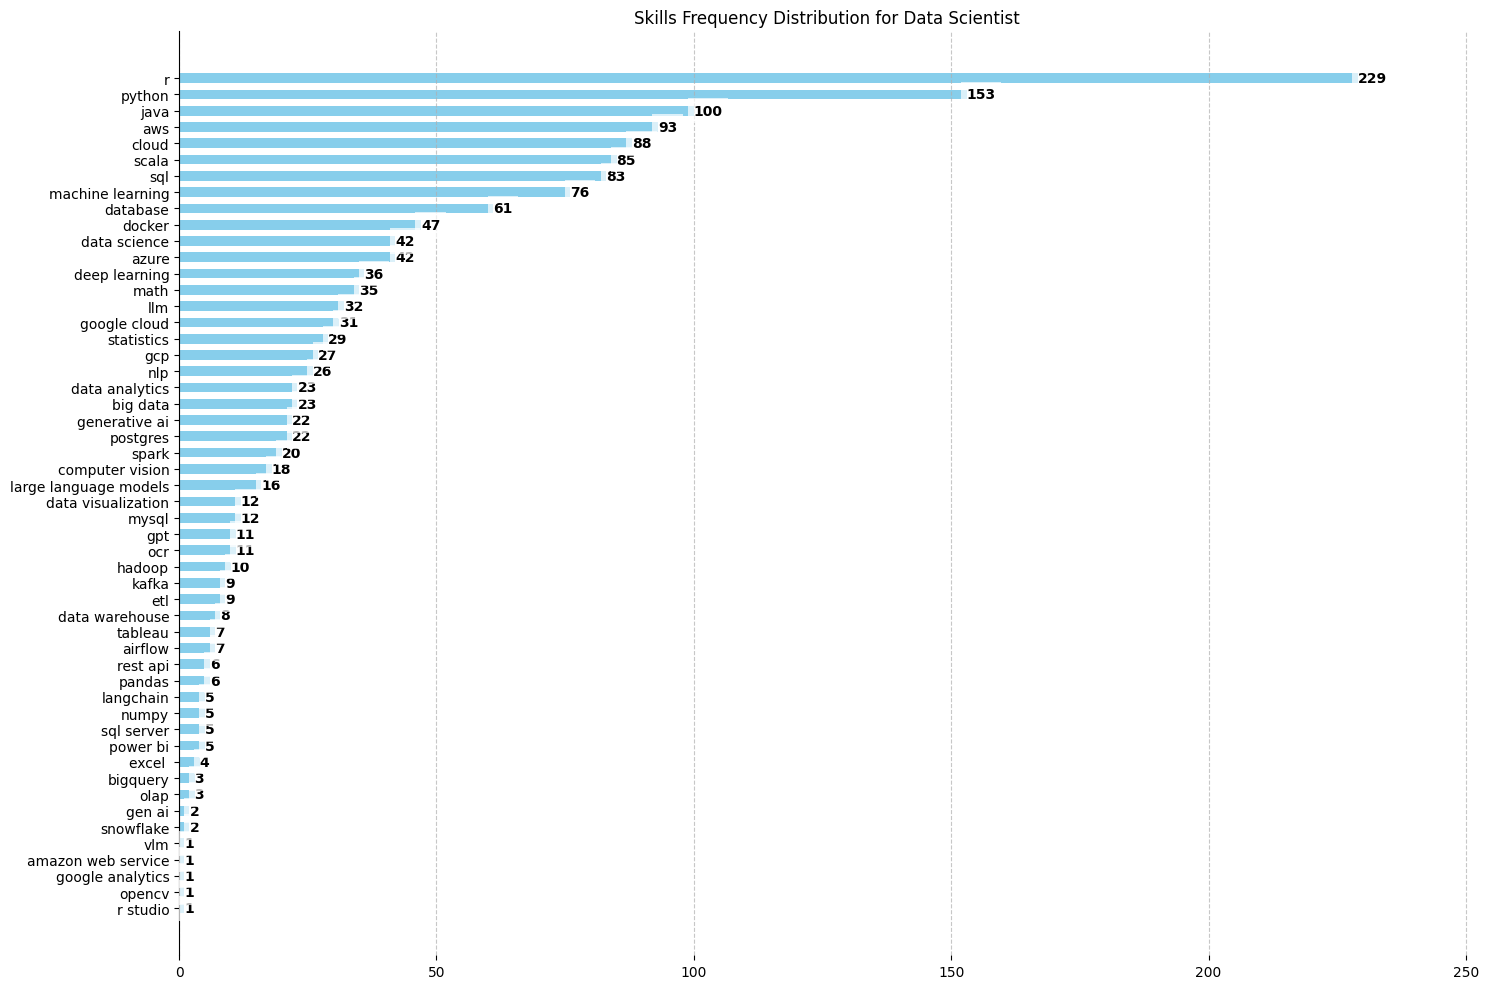

In [ ]:
show_bar_chart(skill_df_ds,'Data Scientist')

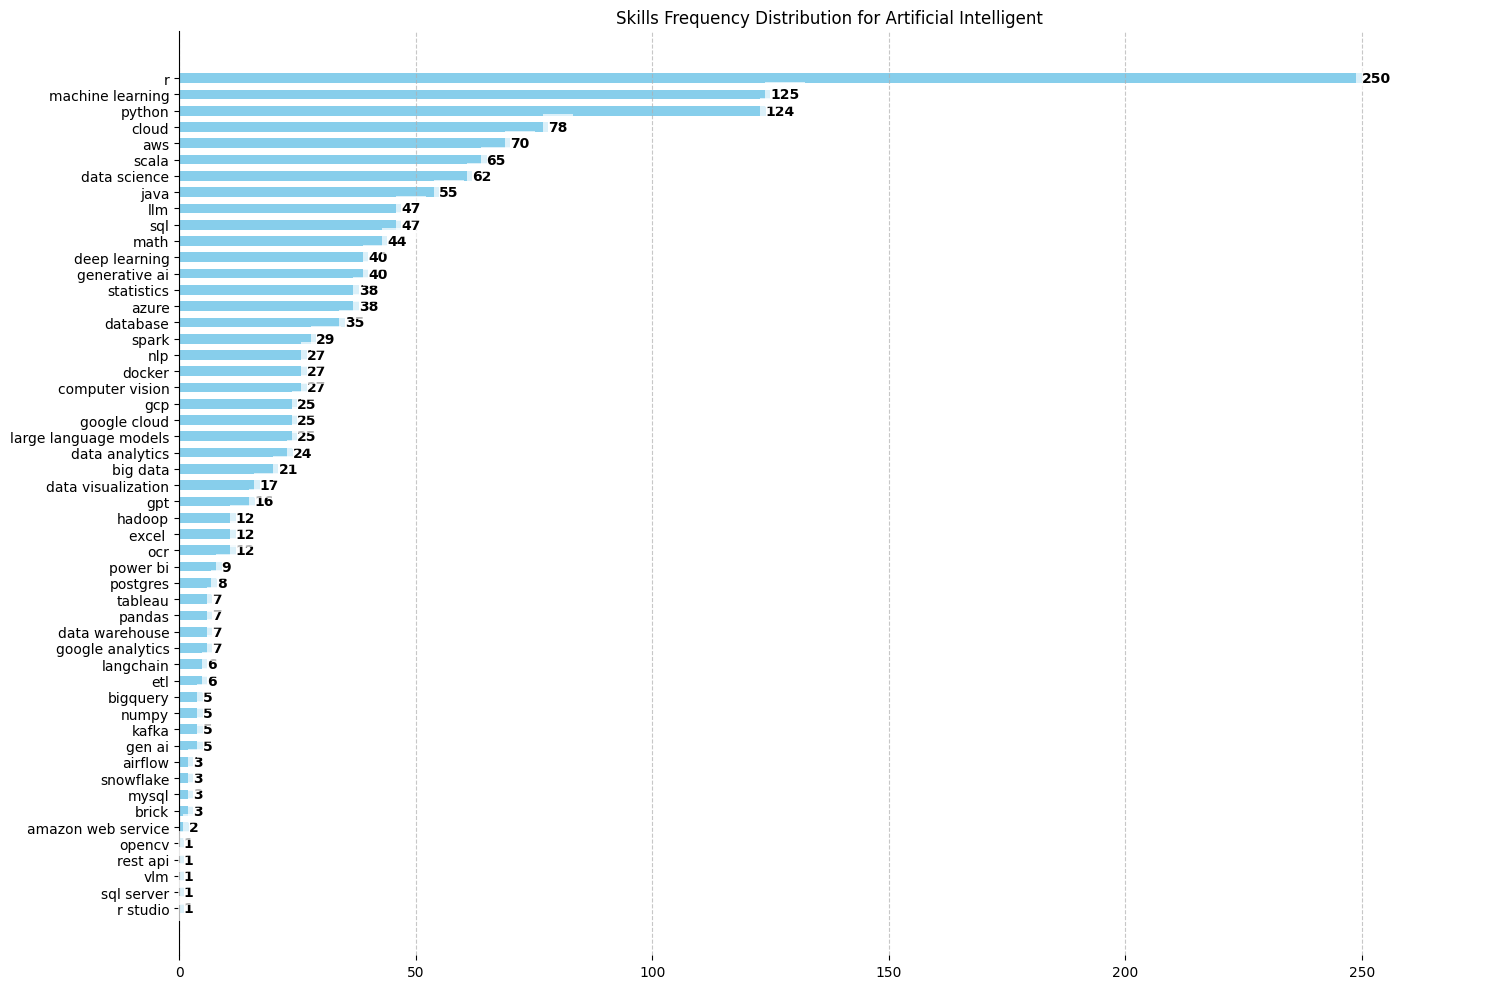

In [ ]:
show_bar_chart(skill_df_ai, 'Artificial Intelligent')

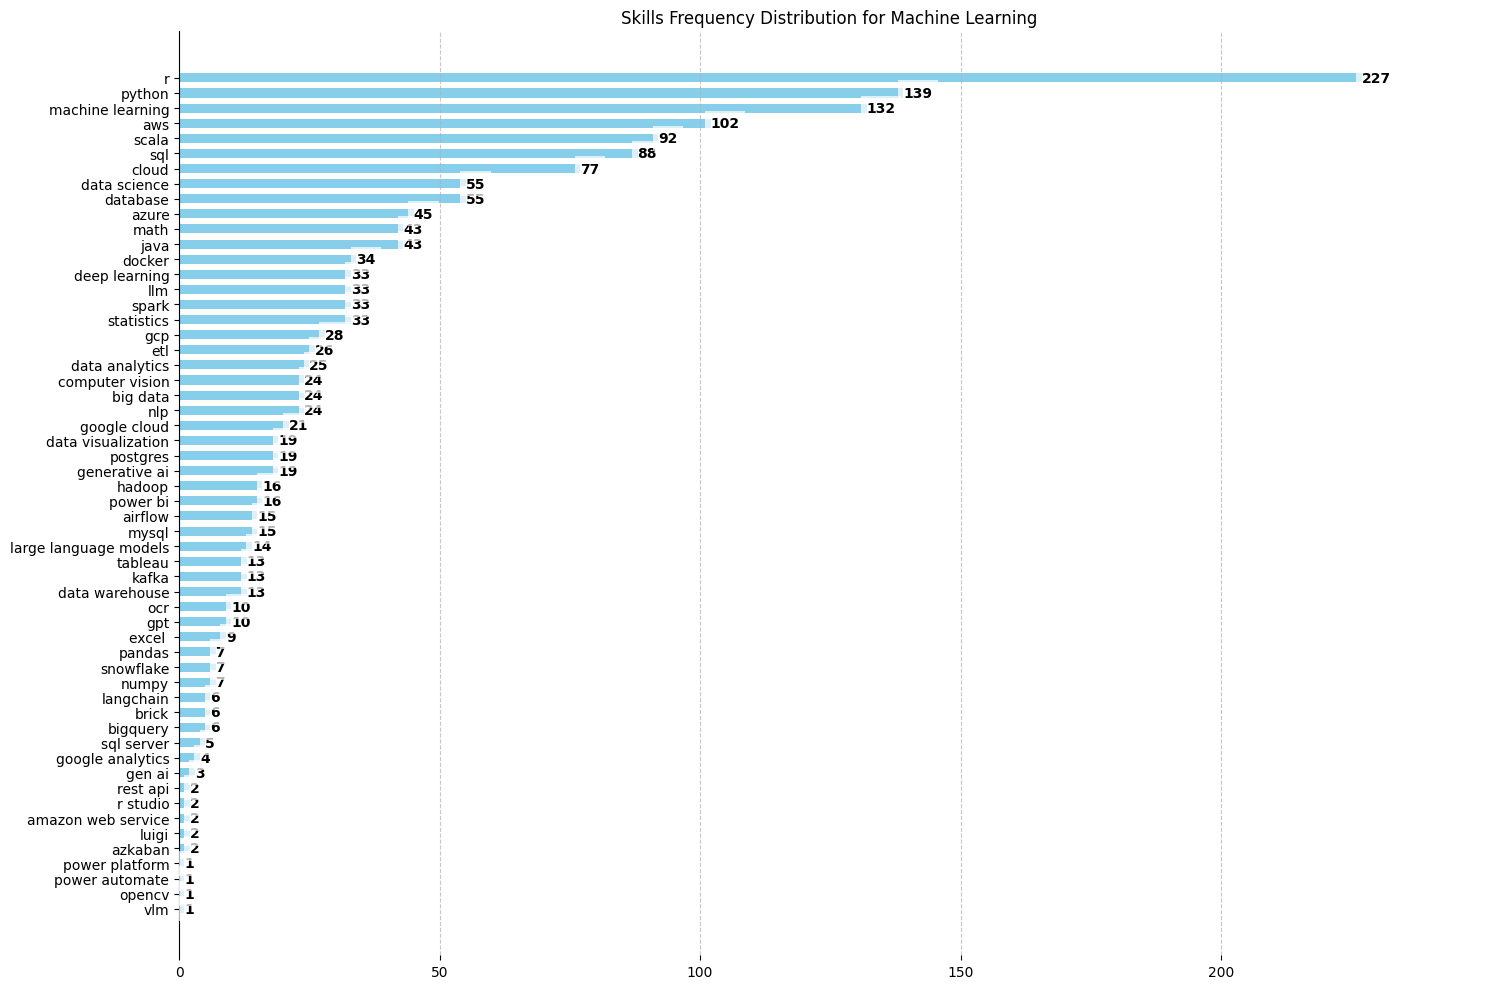

In [ ]:
show_bar_chart(skill_df_ml, 'Machine Learning')